2021-11-11 00:32:22.399070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 00:32:22.399098: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-11 00:32:24.393820: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-11 00:32:24.393864: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nebuchadnezzar
2021-11-11 00:32:24.393873: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nebuchadnezzar
2021-11-11 00:32:24.393940: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 390.144.0
2021-11-11 00:32:24.393970: I tensorflow/stream_executor/cuda

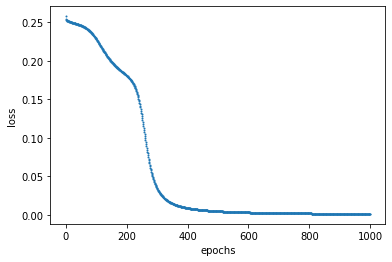

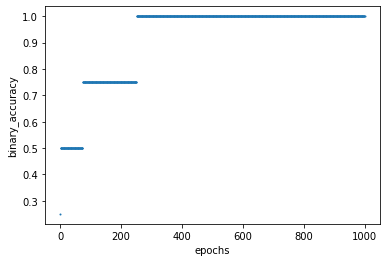

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='' # force no CUDA 

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

training_data = pd.DataFrame([
    {'a': 0, 'b': 0, 'result': 0},
    {'a': 0, 'b': 1, 'result': 1},
    {'a': 1, 'b': 0, 'result': 1},
    {'a': 1, 'b': 1, 'result': 0}
], dtype='float32')

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['binary_accuracy'])

history = model.fit(
    x=training_data[['a', 'b']].values, 
    y=training_data[['result']].values, 
    epochs=1000, 
    verbose=0)

for key in history.history.keys():
    values = history.history[key]
    plt.scatter(range(len(values)), values, s=1)
    plt.ylabel(key)
    plt.xlabel('epochs')
    plt.show()

In [2]:
predictions = pd.DataFrame(model.predict(training_data[['a', 'b']]) >= 0.5, columns=['predicted'])
pd.concat([
    training_data >= 0.5,
    predictions
], axis=1)

,a,b,result,predicted
0,False,False,False,False
1,False,True,True,True
2,True,False,True,True
3,True,True,False,False


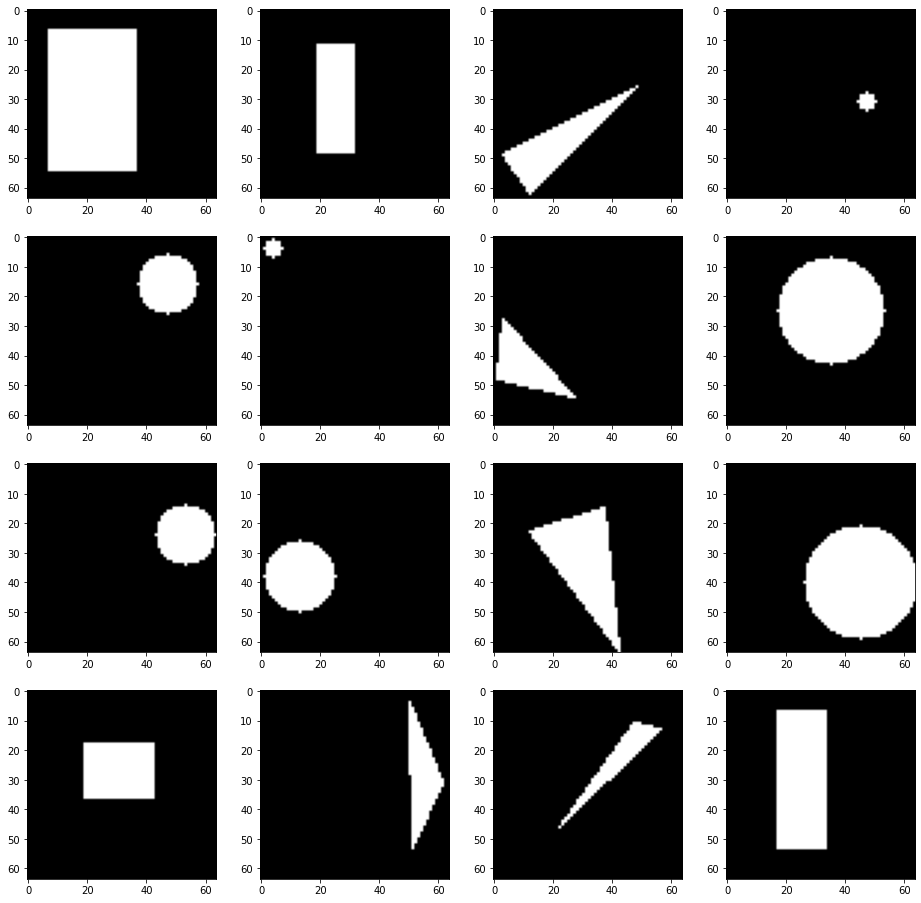

In [3]:
import cv2
import random

r = random.Random(1)

def make_random_image(size):
    img = np.zeros([size, size], dtype=np.uint8)
    
    shape = r.choice(['rectangle', 'circle', 'triangle'])
    if shape == 'rectangle':
        MIN_RECT_SIDE = 5
        left = r.randint(0, size - MIN_RECT_SIDE)
        top = r.randint(0, size - MIN_RECT_SIDE)
        width = r.randint(MIN_RECT_SIDE, size - left)
        height = r.randint(MIN_RECT_SIDE, size - top)
        cv2.rectangle(img, (left, top), (width, height), (1), cv2.FILLED)
    elif shape == 'circle':
        MIN_RADIUS = 3
        MAX_RADIUS = size // 3
        radius = r.randint(MIN_RADIUS, MAX_RADIUS)
        left = r.randint(radius, size - radius)
        top = r.randint(radius, size - radius)
        cv2.circle(img, (left, top), radius, (1), cv2.FILLED)
    elif shape == 'triangle':
        x1 = r.randint(0, size)
        y1 = r.randint(0, size)
        x2 = r.randint(0, size)
        y2 = r.randint(0, size)
        x3 = r.randint(0, size)
        y3 = r.randint(0, size)
        cv2.fillPoly(img, np.array([[(x1, y1), (x2, y2), (x3, y3)]]), (1))
    else:
        raise Error(f'Unknown shape ${shape}')
        
    return img
    
plt.figure(figsize=(16, 16))
for i in range(16):
    img = make_random_image(64)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap=plt.cm.gray)